In [63]:
# std
import os
import sys
import re

# 3rd party
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [64]:
def get_path(filename, dirname=None):
    root = os.path.dirname(os.path.dirname(os.getcwd()))
    path = os.path.join(root, dirname, filename) if dirname else os.path.join(root, filename)

    return path

In [65]:
path = get_path('hntn_train_validate_and_test_fb15k_200d_cost.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_fb15k_200d_cost.csv'

In [66]:
results_cost = pd.read_csv(path)
results_cost.head()

,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,0.002101,0.002157,0.002065,0.003582,0.003608,0.003378
1,0.002132,0.002261,0.002147,0.003392,0.003460,0.003234
2,0.002156,0.002307,0.002187,0.003562,0.003647,0.003395
3,0.002199,0.002357,0.002233,0.003548,0.003631,0.003378
4,0.002280,0.002460,0.002328,0.003632,0.003738,0.003472


In [67]:
results_cost = results_cost.reset_index()
results_cost.head()

,index,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,0,0.002101,0.002157,0.002065,0.003582,0.003608,0.003378
1,1,0.002132,0.002261,0.002147,0.003392,0.003460,0.003234
2,2,0.002156,0.002307,0.002187,0.003562,0.003647,0.003395
3,3,0.002199,0.002357,0.002233,0.003548,0.003631,0.003378
4,4,0.002280,0.002460,0.002328,0.003632,0.003738,0.003472


In [68]:
results_cost = results_cost.rename(columns={'index': 'epoch'})
results_cost.head()

,epoch,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,0,0.002101,0.002157,0.002065,0.003582,0.003608,0.003378
1,1,0.002132,0.002261,0.002147,0.003392,0.003460,0.003234
2,2,0.002156,0.002307,0.002187,0.003562,0.003647,0.003395
3,3,0.002199,0.002357,0.002233,0.003548,0.003631,0.003378
4,4,0.002280,0.002460,0.002328,0.003632,0.003738,0.003472


In [69]:
results_cost['epoch'] += 1
results_cost.head()

,epoch,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis,cost_training_baseline,cost_validation_baseline,cost_test_baseline
0,1,0.002101,0.002157,0.002065,0.003582,0.003608,0.003378
1,2,0.002132,0.002261,0.002147,0.003392,0.003460,0.003234
2,3,0.002156,0.002307,0.002187,0.003562,0.003647,0.003395
3,4,0.002199,0.002357,0.002233,0.003548,0.003631,0.003378
4,5,0.002280,0.002460,0.002328,0.003632,0.003738,0.003472


In [70]:
results_cost = results_cost.drop(['cost_test_baseline', 'cost_test_hypothesis'], axis=1)
results_cost['epoch'] *= 10
results_cost.head()

,epoch,cost_training_hypothesis,cost_validation_hypothesis,cost_training_baseline,cost_validation_baseline
0,10,0.002101,0.002157,0.003582,0.003608
1,20,0.002132,0.002261,0.003392,0.003460
2,30,0.002156,0.002307,0.003562,0.003647
3,40,0.002199,0.002357,0.003548,0.003631
4,50,0.002280,0.002460,0.003632,0.003738


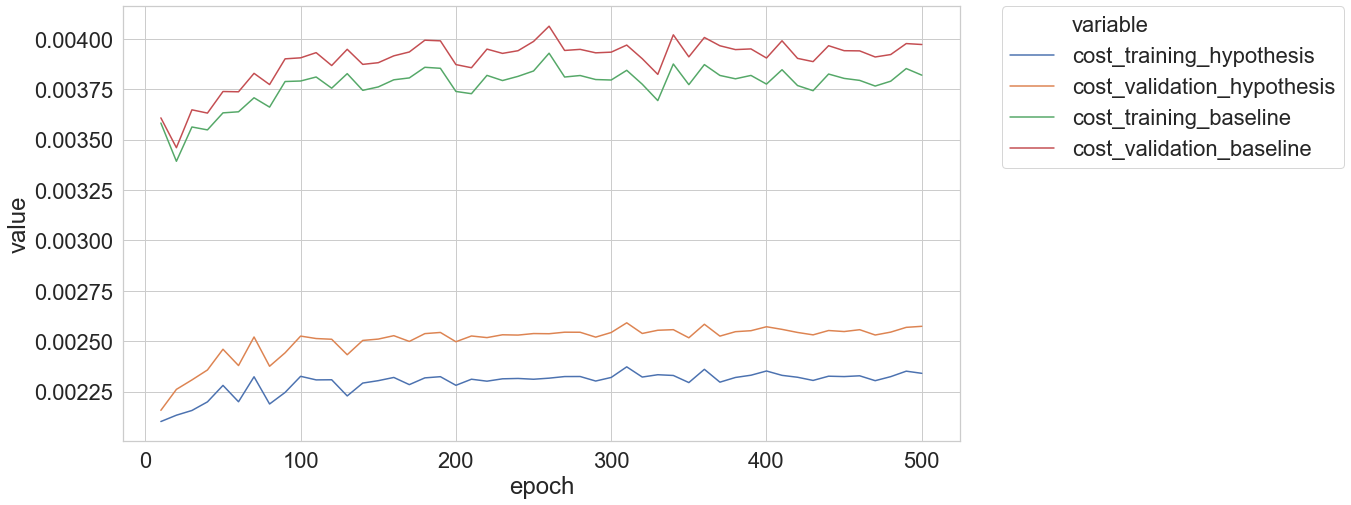

In [71]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost[:50], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('FB15k_Cost_Results.png', bbox_inches = "tight", format='PNG')

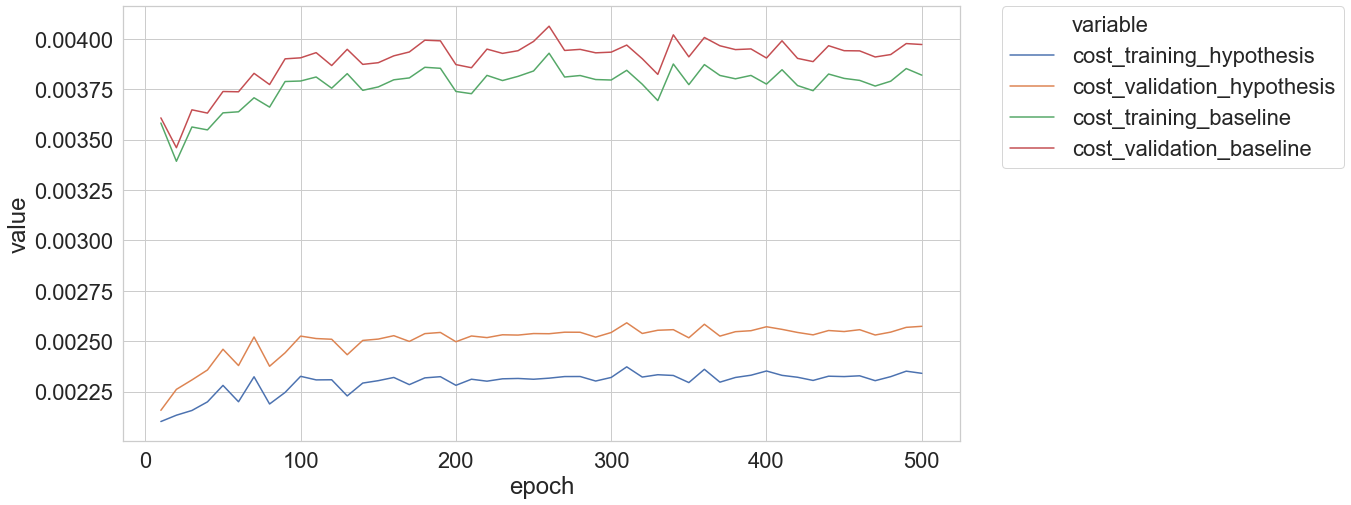

In [72]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost[:50], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('FB15k_Cost_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [73]:
path = get_path('hntn_train_validate_and_test_FB15k_200d_hits_at_10.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_FB15k_200d_hits_at_10.csv'

In [74]:
results_hits_at_10 = pd.read_csv(path)
results_hits_at_10.head()

,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,0.74690,0.63782,0.677617,0.71120,0.62680,0.662093
1,0.90686,0.75151,0.820800,0.83254,0.70875,0.760221
2,0.94911,0.77906,0.862208,0.87159,0.73989,0.797117
3,0.96474,0.79040,0.878604,0.88904,0.75358,0.818320
4,0.97287,0.79466,0.883742,0.90495,0.76397,0.830221


In [75]:
results_hits_at_10 = results_hits_at_10.reset_index()
results_hits_at_10.head()

,index,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,0,0.74690,0.63782,0.677617,0.71120,0.62680,0.662093
1,1,0.90686,0.75151,0.820800,0.83254,0.70875,0.760221
2,2,0.94911,0.77906,0.862208,0.87159,0.73989,0.797117
3,3,0.96474,0.79040,0.878604,0.88904,0.75358,0.818320
4,4,0.97287,0.79466,0.883742,0.90495,0.76397,0.830221


In [76]:
results_hits_at_10 = results_hits_at_10.rename(columns={'index': 'epoch'})
results_hits_at_10.head()

,epoch,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,0,0.74690,0.63782,0.677617,0.71120,0.62680,0.662093
1,1,0.90686,0.75151,0.820800,0.83254,0.70875,0.760221
2,2,0.94911,0.77906,0.862208,0.87159,0.73989,0.797117
3,3,0.96474,0.79040,0.878604,0.88904,0.75358,0.818320
4,4,0.97287,0.79466,0.883742,0.90495,0.76397,0.830221


In [77]:
results_hits_at_10['epoch'] += 1
results_hits_at_10.head()

,epoch,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline
0,1,0.74690,0.63782,0.677617,0.71120,0.62680,0.662093
1,2,0.90686,0.75151,0.820800,0.83254,0.70875,0.760221
2,3,0.94911,0.77906,0.862208,0.87159,0.73989,0.797117
3,4,0.96474,0.79040,0.878604,0.88904,0.75358,0.818320
4,5,0.97287,0.79466,0.883742,0.90495,0.76397,0.830221


In [78]:
results_hits_at_10_test = results_hits_at_10[['hits_at_10_test_baseline', 'hits_at_10_test_hypothesis']]
results_hits_at_10_test.head()

,hits_at_10_test_baseline,hits_at_10_test_hypothesis
0,0.662093,0.677617
1,0.760221,0.820800
2,0.797117,0.862208
3,0.818320,0.878604
4,0.830221,0.883742


In [79]:
results_hits_at_10_test.max()

hits_at_10_test_baseline      0.880077
hits_at_10_test_hypothesis    0.892883
dtype: float64

In [80]:
results_hits_at_10 = results_hits_at_10.drop(['hits_at_10_test_baseline', 'hits_at_10_test_hypothesis'], axis=1)
results_hits_at_10['epoch'] *= 10
results_hits_at_10.head()

,epoch,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_training_baseline,hits_at_10_validation_baseline
0,10,0.74690,0.63782,0.71120,0.62680
1,20,0.90686,0.75151,0.83254,0.70875
2,30,0.94911,0.77906,0.87159,0.73989
3,40,0.96474,0.79040,0.88904,0.75358
4,50,0.97287,0.79466,0.90495,0.76397


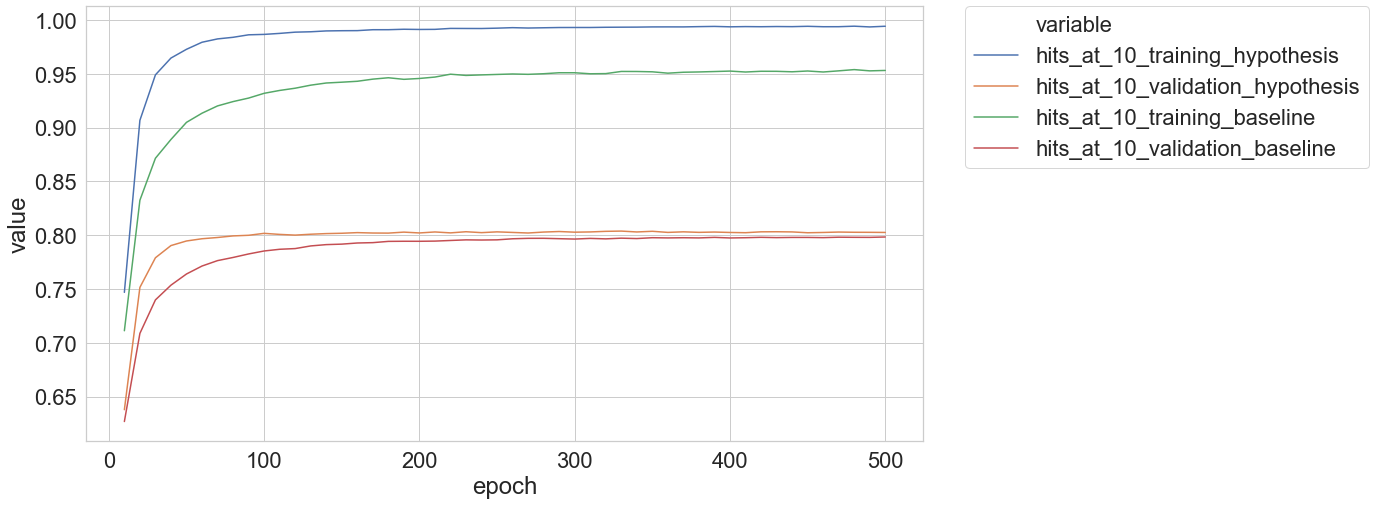

In [81]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_10[:50], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('FB15k_hits_at_10_Results.png', bbox_inches = "tight", format='PNG')

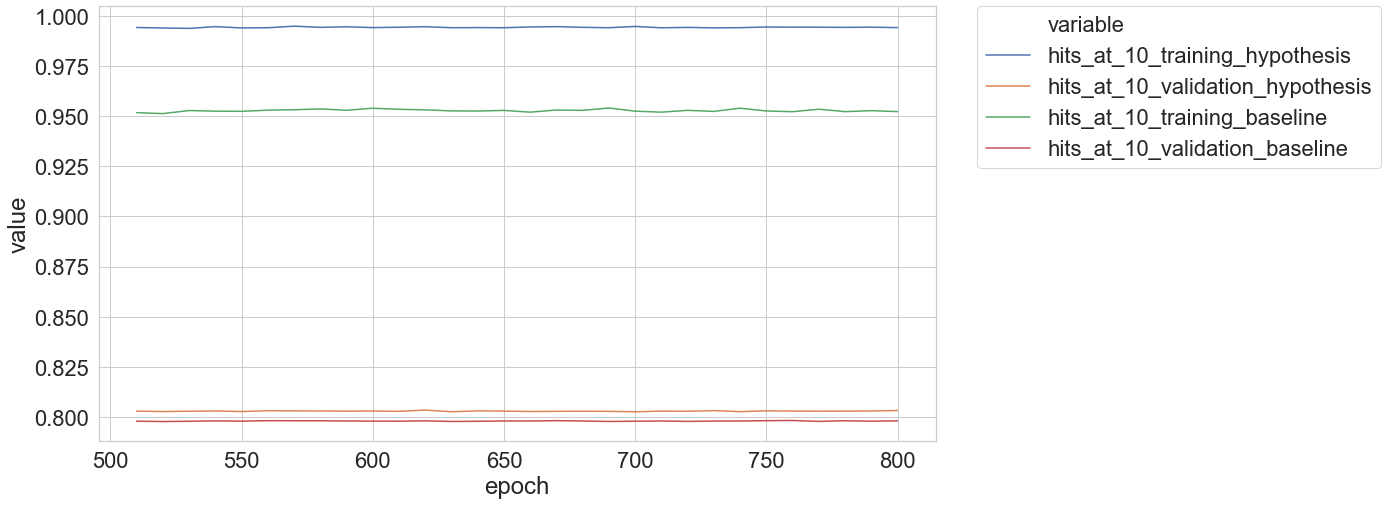

In [82]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_10[50:], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('FB15k_hits_at_10_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [83]:
path = get_path('hntn_train_validate_and_test_fb15k_200d_hits_at_3.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_fb15k_200d_hits_at_3.csv'

In [84]:
results_hits_at_3 = pd.read_csv(path)
results_hits_at_3.head()

,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,0.60561,0.48405,0.548577,0.56391,0.46930,0.533053
1,0.81981,0.60933,0.717526,0.71280,0.55315,0.640627
2,0.88441,0.64782,0.779909,0.76848,0.58817,0.691126
3,0.91323,0.66208,0.810110,0.79511,0.60827,0.716096
4,0.93376,0.67067,0.820242,0.81870,0.62033,0.735479


In [85]:
results_hits_at_3 = results_hits_at_3.reset_index()
results_hits_at_3.head()

,index,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,0,0.60561,0.48405,0.548577,0.56391,0.46930,0.533053
1,1,0.81981,0.60933,0.717526,0.71280,0.55315,0.640627
2,2,0.88441,0.64782,0.779909,0.76848,0.58817,0.691126
3,3,0.91323,0.66208,0.810110,0.79511,0.60827,0.716096
4,4,0.93376,0.67067,0.820242,0.81870,0.62033,0.735479


In [86]:
results_hits_at_3 = results_hits_at_3.rename(columns={'index': 'epoch'})
results_hits_at_3.head()

,epoch,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,0,0.60561,0.48405,0.548577,0.56391,0.46930,0.533053
1,1,0.81981,0.60933,0.717526,0.71280,0.55315,0.640627
2,2,0.88441,0.64782,0.779909,0.76848,0.58817,0.691126
3,3,0.91323,0.66208,0.810110,0.79511,0.60827,0.716096
4,4,0.93376,0.67067,0.820242,0.81870,0.62033,0.735479


In [87]:
results_hits_at_3['epoch'] += 1
results_hits_at_3.head()

,epoch,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline
0,1,0.60561,0.48405,0.548577,0.56391,0.46930,0.533053
1,2,0.81981,0.60933,0.717526,0.71280,0.55315,0.640627
2,3,0.88441,0.64782,0.779909,0.76848,0.58817,0.691126
3,4,0.91323,0.66208,0.810110,0.79511,0.60827,0.716096
4,5,0.93376,0.67067,0.820242,0.81870,0.62033,0.735479


In [88]:
results_hits_at_3_test = results_hits_at_3[['hits_at_3_test_baseline', 'hits_at_3_test_hypothesis']]
results_hits_at_3_test.head()

,hits_at_3_test_baseline,hits_at_3_test_hypothesis
0,0.533053,0.548577
1,0.640627,0.717526
2,0.691126,0.779909
3,0.716096,0.810110
4,0.735479,0.820242


In [89]:
results_hits_at_3_test.max()

hits_at_3_test_baseline      0.818100
hits_at_3_test_hypothesis    0.852796
dtype: float64

In [90]:
results_hits_at_3 = results_hits_at_3.drop(['hits_at_3_test_baseline', 'hits_at_3_test_hypothesis'], axis=1)
results_hits_at_3['epoch'] *= 10
results_hits_at_3.head()

,epoch,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_training_baseline,hits_at_3_validation_baseline
0,10,0.60561,0.48405,0.56391,0.46930
1,20,0.81981,0.60933,0.71280,0.55315
2,30,0.88441,0.64782,0.76848,0.58817
3,40,0.91323,0.66208,0.79511,0.60827
4,50,0.93376,0.67067,0.81870,0.62033


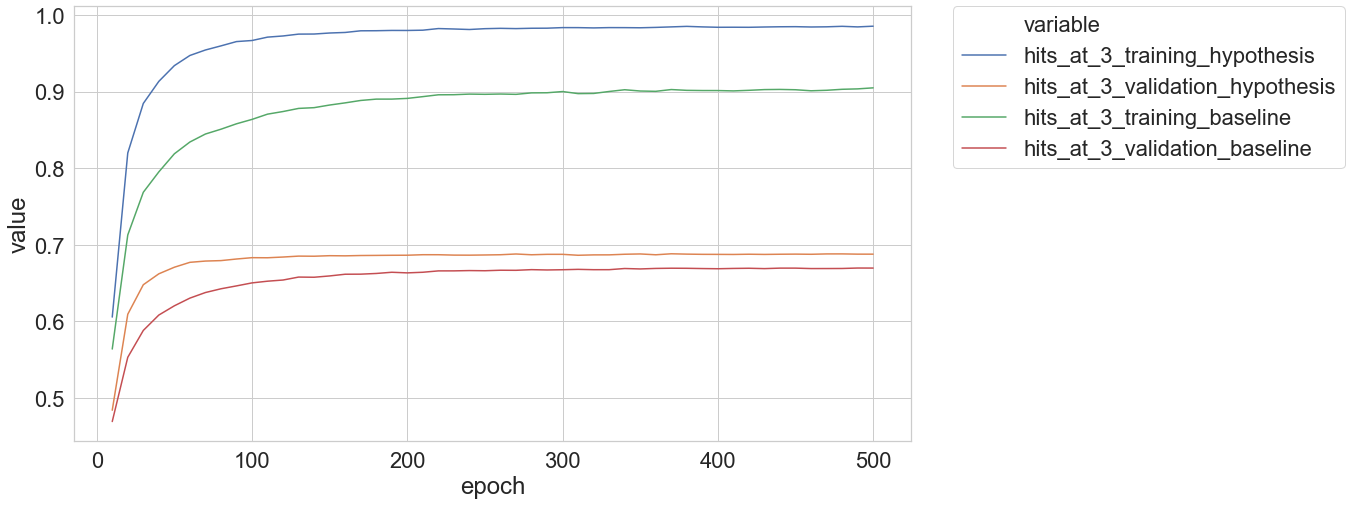

In [91]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_3[:50], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('FB15k_hits_at_3_Results.png', bbox_inches = "tight", format='PNG')

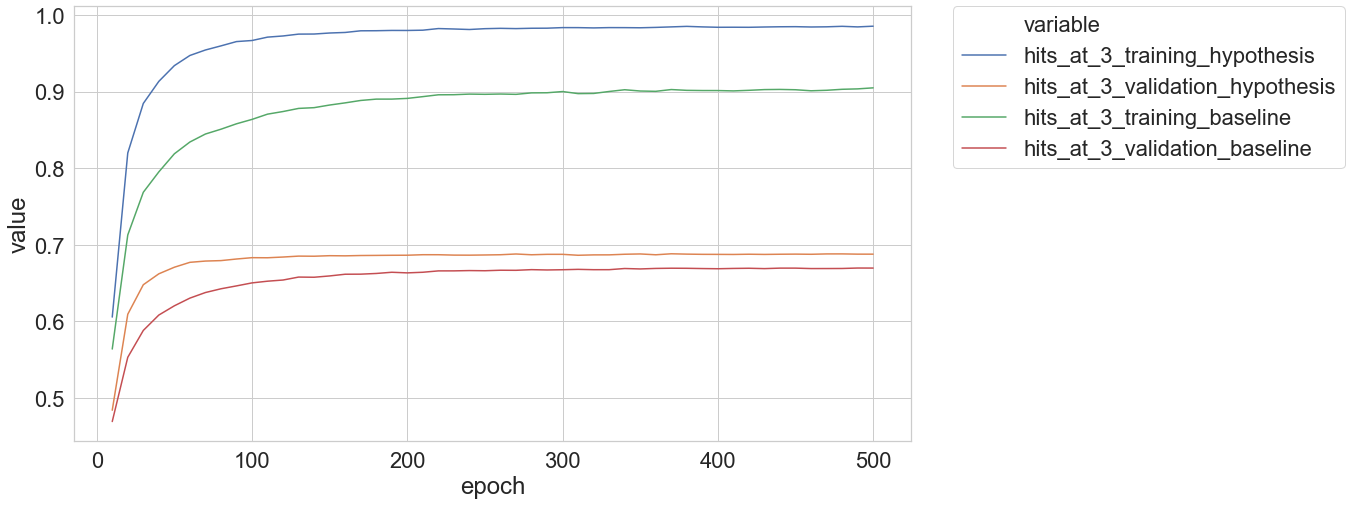

In [92]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_3[:50], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('FB15k_hits_at_3_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [93]:
path = get_path('hntn_train_validate_and_test_fb15k_200d_hits_at_1.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_fb15k_200d_hits_at_1.csv'

In [94]:
results_hits_at_1 = pd.read_csv(path)
results_hits_at_1.head()

,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,0.42925,0.31476,0.394762,0.37722,0.29435,0.368988
1,0.66811,0.42059,0.570627,0.53024,0.36371,0.473193
2,0.75634,0.46006,0.648440,0.59888,0.39520,0.528280
3,0.80090,0.47434,0.691050,0.62980,0.41314,0.559539
4,0.83366,0.48342,0.711804,0.66253,0.42518,0.582223


In [95]:
results_hits_at_1 = results_hits_at_1.reset_index()
results_hits_at_1.head()

,index,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,0,0.42925,0.31476,0.394762,0.37722,0.29435,0.368988
1,1,0.66811,0.42059,0.570627,0.53024,0.36371,0.473193
2,2,0.75634,0.46006,0.648440,0.59888,0.39520,0.528280
3,3,0.80090,0.47434,0.691050,0.62980,0.41314,0.559539
4,4,0.83366,0.48342,0.711804,0.66253,0.42518,0.582223


In [96]:
results_hits_at_1 = results_hits_at_1.rename(columns={'index': 'epoch'})
results_hits_at_1.head()

,epoch,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,0,0.42925,0.31476,0.394762,0.37722,0.29435,0.368988
1,1,0.66811,0.42059,0.570627,0.53024,0.36371,0.473193
2,2,0.75634,0.46006,0.648440,0.59888,0.39520,0.528280
3,3,0.80090,0.47434,0.691050,0.62980,0.41314,0.559539
4,4,0.83366,0.48342,0.711804,0.66253,0.42518,0.582223


In [97]:
results_hits_at_1['epoch'] += 1
results_hits_at_1.head()

,epoch,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline
0,1,0.42925,0.31476,0.394762,0.37722,0.29435,0.368988
1,2,0.66811,0.42059,0.570627,0.53024,0.36371,0.473193
2,3,0.75634,0.46006,0.648440,0.59888,0.39520,0.528280
3,4,0.80090,0.47434,0.691050,0.62980,0.41314,0.559539
4,5,0.83366,0.48342,0.711804,0.66253,0.42518,0.582223


In [98]:
results_hits_at_1_test = results_hits_at_1[['hits_at_1_test_baseline', 'hits_at_1_test_hypothesis']]
results_hits_at_1_test.head()

,hits_at_1_test_baseline,hits_at_1_test_hypothesis
0,0.368988,0.394762
1,0.473193,0.570627
2,0.528280,0.648440
3,0.559539,0.691050
4,0.582223,0.711804


In [99]:
results_hits_at_1_test.max()

hits_at_1_test_baseline      0.699878
hits_at_1_test_hypothesis    0.787865
dtype: float64

In [100]:
results_hits_at_1 = results_hits_at_1.drop(['hits_at_1_test_baseline', 'hits_at_1_test_hypothesis'], axis=1)
results_hits_at_1['epoch'] *= 10
results_hits_at_1.head()

,epoch,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_training_baseline,hits_at_1_validation_baseline
0,10,0.42925,0.31476,0.37722,0.29435
1,20,0.66811,0.42059,0.53024,0.36371
2,30,0.75634,0.46006,0.59888,0.39520
3,40,0.80090,0.47434,0.62980,0.41314
4,50,0.83366,0.48342,0.66253,0.42518


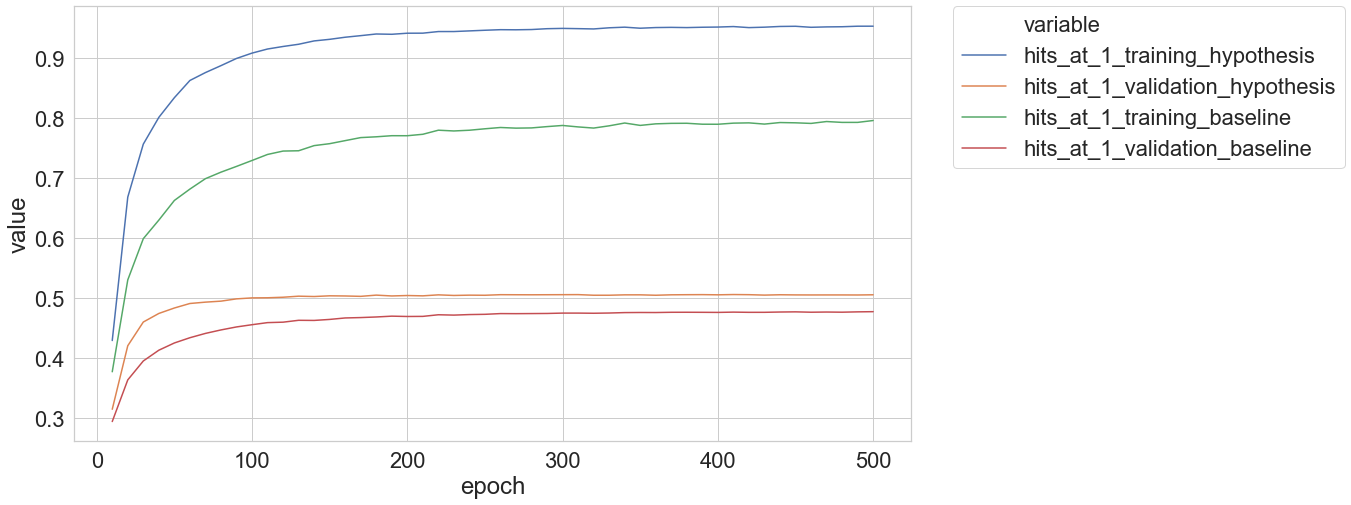

In [101]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_1[:50], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('FB15k_hits_at_1_Results.png', bbox_inches = "tight", format='PNG')

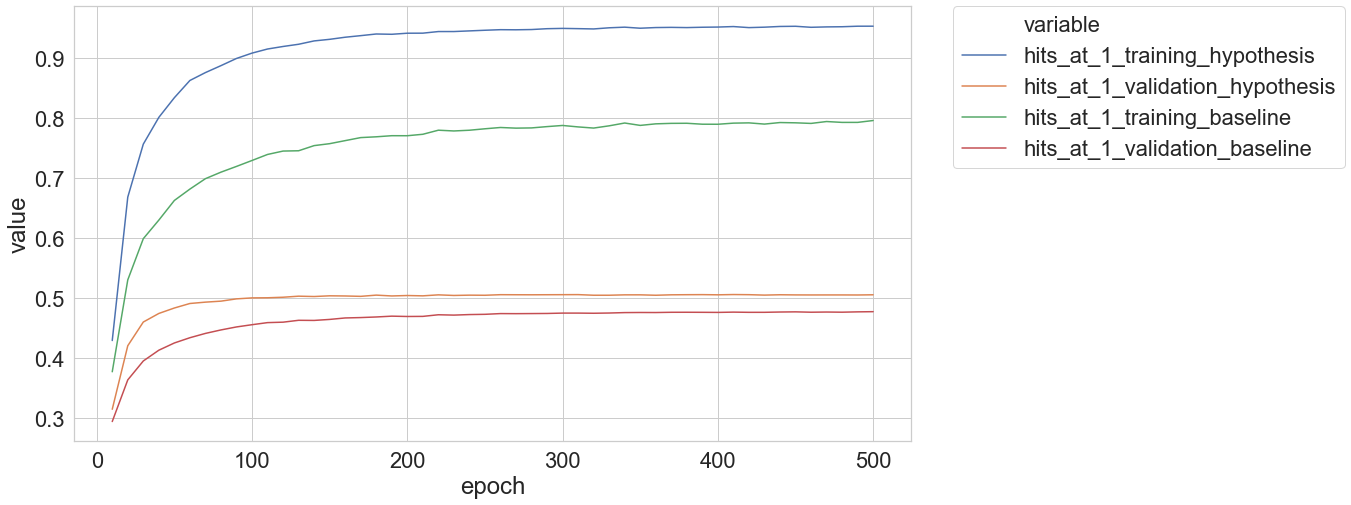

In [102]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_1[:50], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('FB15k_hits_at_1_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [103]:
path = get_path('hntn_train_validate_and_test_fb15k_200d_mean_rank.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_fb15k_200d_mean_rank.csv'

In [104]:
results_mean_rank = pd.read_csv(path)
results_mean_rank.head()

,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,56.50957,131.33090,127.173190,99.14332,157.86391,153.166461
1,8.99823,90.29827,80.376657,56.21122,113.93310,108.170735
2,4.30687,90.92463,79.852974,40.73757,105.53195,95.354649
3,3.43750,92.12247,82.608175,35.53674,99.70463,89.411310
4,2.71132,92.85894,81.465245,26.68127,96.23725,84.864189


In [105]:
results_mean_rank = results_mean_rank.reset_index()
results_mean_rank.head()

,index,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,0,56.50957,131.33090,127.173190,99.14332,157.86391,153.166461
1,1,8.99823,90.29827,80.376657,56.21122,113.93310,108.170735
2,2,4.30687,90.92463,79.852974,40.73757,105.53195,95.354649
3,3,3.43750,92.12247,82.608175,35.53674,99.70463,89.411310
4,4,2.71132,92.85894,81.465245,26.68127,96.23725,84.864189


In [106]:
results_mean_rank = results_mean_rank.rename(columns={'index': 'epoch'})
results_mean_rank.head()

,epoch,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,0,56.50957,131.33090,127.173190,99.14332,157.86391,153.166461
1,1,8.99823,90.29827,80.376657,56.21122,113.93310,108.170735
2,2,4.30687,90.92463,79.852974,40.73757,105.53195,95.354649
3,3,3.43750,92.12247,82.608175,35.53674,99.70463,89.411310
4,4,2.71132,92.85894,81.465245,26.68127,96.23725,84.864189


In [107]:
results_mean_rank['epoch'] += 1
results_mean_rank['epoch'] *= 10
results_mean_rank.head()

,epoch,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline
0,10,56.50957,131.33090,127.173190,99.14332,157.86391,153.166461
1,20,8.99823,90.29827,80.376657,56.21122,113.93310,108.170735
2,30,4.30687,90.92463,79.852974,40.73757,105.53195,95.354649
3,40,3.43750,92.12247,82.608175,35.53674,99.70463,89.411310
4,50,2.71132,92.85894,81.465245,26.68127,96.23725,84.864189


In [108]:
results_mean_rank_test = results_mean_rank[['mean_rank_test_baseline', 'mean_rank_test_hypothesis']]
results_mean_rank_test.head()

,mean_rank_test_baseline,mean_rank_test_hypothesis
0,153.166461,127.173190
1,108.170735,80.376657
2,95.354649,79.852974
3,89.411310,82.608175
4,84.864189,81.465245


In [109]:
results_mean_rank_test.min()

mean_rank_test_baseline      66.304286
mean_rank_test_hypothesis    79.852974
dtype: float64

In [110]:
results_mean_rank = results_mean_rank.drop(['mean_rank_test_baseline', 'mean_rank_test_hypothesis'], axis=1)
results_mean_rank.head()

,epoch,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_training_baseline,mean_rank_validation_baseline
0,10,56.50957,131.33090,99.14332,157.86391
1,20,8.99823,90.29827,56.21122,113.93310
2,30,4.30687,90.92463,40.73757,105.53195
3,40,3.43750,92.12247,35.53674,99.70463
4,50,2.71132,92.85894,26.68127,96.23725


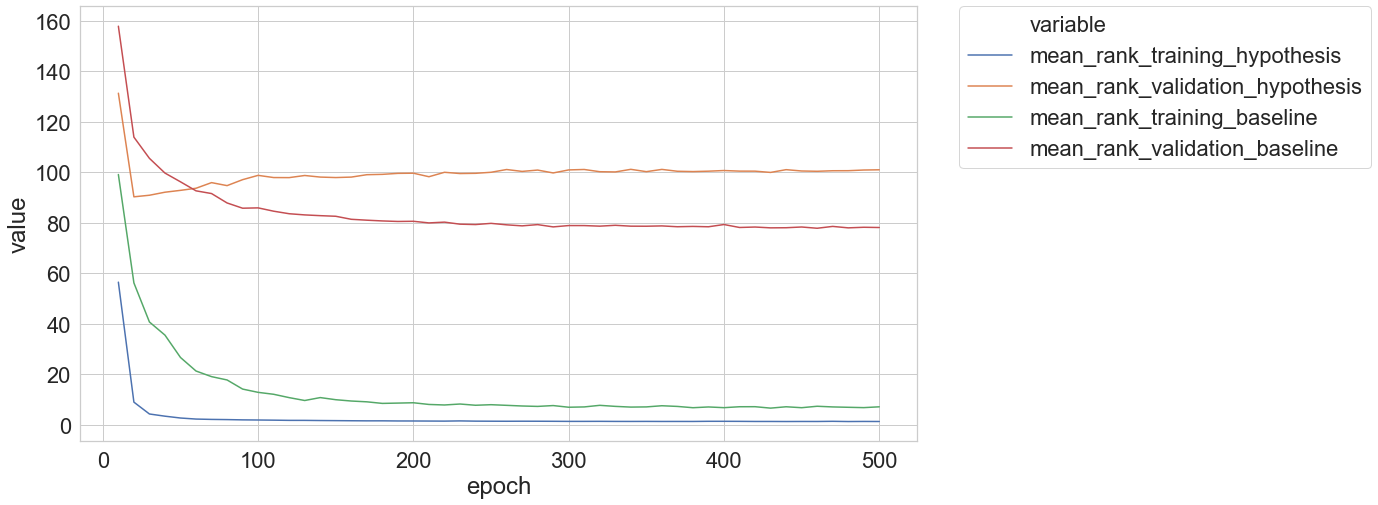

In [111]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_rank[:50], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('FB15k_mean_rank_Results.png', bbox_inches = "tight", format='PNG')

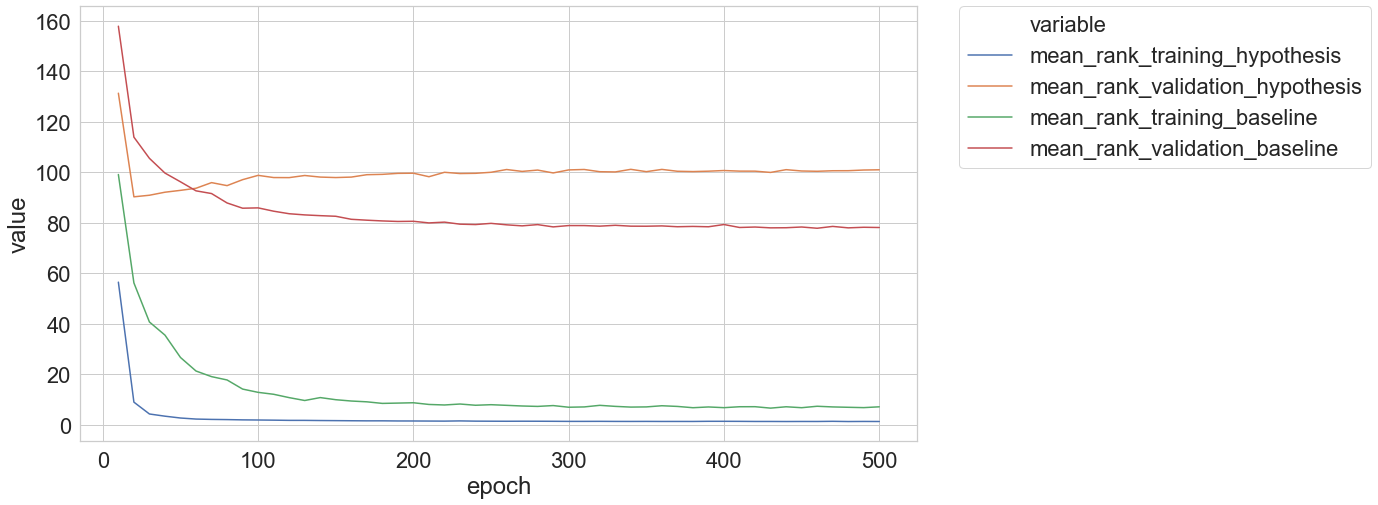

In [112]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_rank[:50], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('FB15k_mean_rank_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [113]:
path = get_path('hntn_train_validate_and_test_fb15k_200d_mean_reciprocal_rank.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_fb15k_200d_mean_reciprocal_rank.csv'

In [114]:
results_mean_reciprocal_rank = pd.read_csv(path)
results_mean_reciprocal_rank.head()

,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,0.540383,0.425768,0.494265,0.494545,0.408735,0.473662
1,0.755962,0.537252,0.660088,0.639109,0.483505,0.576695
2,0.828413,0.573983,0.726423,0.698457,0.515618,0.626689
3,0.863243,0.587532,0.760544,0.725468,0.533567,0.653887
4,0.887975,0.595447,0.775534,0.752168,0.545172,0.673527


In [115]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.reset_index()
results_mean_reciprocal_rank.head()

,index,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,0,0.540383,0.425768,0.494265,0.494545,0.408735,0.473662
1,1,0.755962,0.537252,0.660088,0.639109,0.483505,0.576695
2,2,0.828413,0.573983,0.726423,0.698457,0.515618,0.626689
3,3,0.863243,0.587532,0.760544,0.725468,0.533567,0.653887
4,4,0.887975,0.595447,0.775534,0.752168,0.545172,0.673527


In [116]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.rename(columns={'index': 'epoch'})
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,0,0.540383,0.425768,0.494265,0.494545,0.408735,0.473662
1,1,0.755962,0.537252,0.660088,0.639109,0.483505,0.576695
2,2,0.828413,0.573983,0.726423,0.698457,0.515618,0.626689
3,3,0.863243,0.587532,0.760544,0.725468,0.533567,0.653887
4,4,0.887975,0.595447,0.775534,0.752168,0.545172,0.673527


In [117]:
results_mean_reciprocal_rank['epoch'] += 1
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline
0,1,0.540383,0.425768,0.494265,0.494545,0.408735,0.473662
1,2,0.755962,0.537252,0.660088,0.639109,0.483505,0.576695
2,3,0.828413,0.573983,0.726423,0.698457,0.515618,0.626689
3,4,0.863243,0.587532,0.760544,0.725468,0.533567,0.653887
4,5,0.887975,0.595447,0.775534,0.752168,0.545172,0.673527


In [118]:
results_mean_reciprocal_rank_test = results_mean_reciprocal_rank[['mean_reciprocal_rank_test_baseline', 'mean_reciprocal_rank_test_hypothesis']]
results_mean_reciprocal_rank_test.head()

,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_test_hypothesis
0,0.473662,0.494265
1,0.576695,0.660088
2,0.626689,0.726423
3,0.653887,0.760544
4,0.673527,0.775534


In [119]:
results_mean_reciprocal_rank_test.max()

mean_reciprocal_rank_test_baseline      0.768166
mean_reciprocal_rank_test_hypothesis    0.826838
dtype: float64

In [120]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.drop(['mean_reciprocal_rank_test_baseline', 'mean_reciprocal_rank_test_hypothesis'], axis=1)
results_mean_reciprocal_rank['epoch'] *= 10
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline
0,10,0.540383,0.425768,0.494545,0.408735
1,20,0.755962,0.537252,0.639109,0.483505
2,30,0.828413,0.573983,0.698457,0.515618
3,40,0.863243,0.587532,0.725468,0.533567
4,50,0.887975,0.595447,0.752168,0.545172


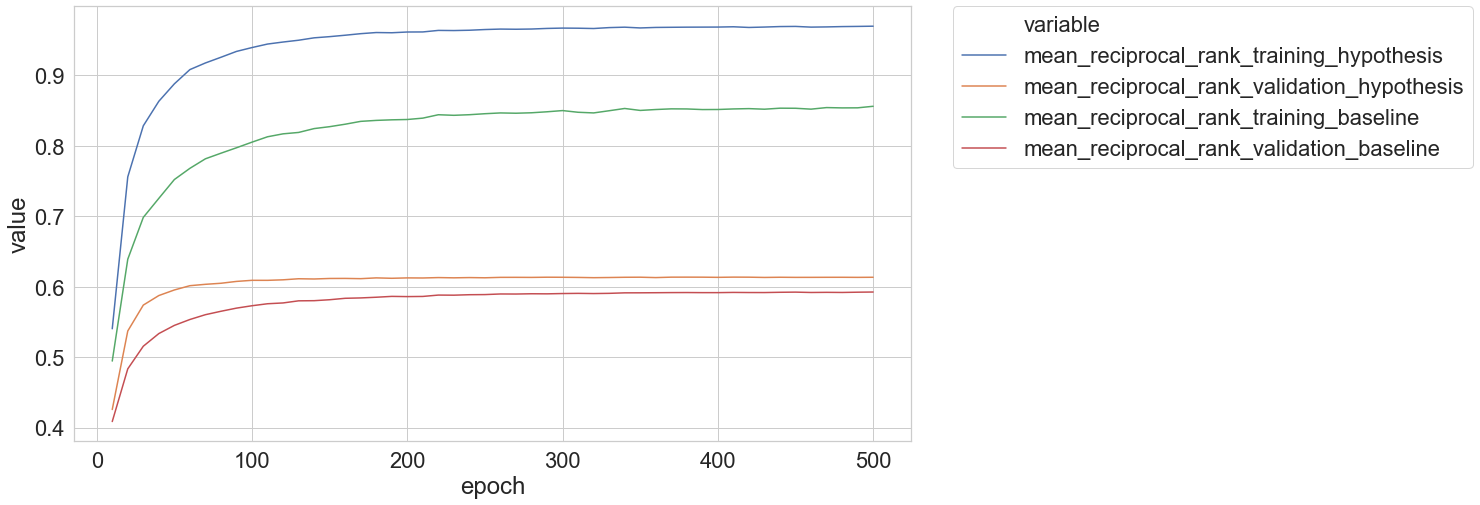

In [121]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_reciprocal_rank[:50], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('FB15k_mean_reciprocal_rank_Results.png', bbox_inches = "tight", format='PNG')

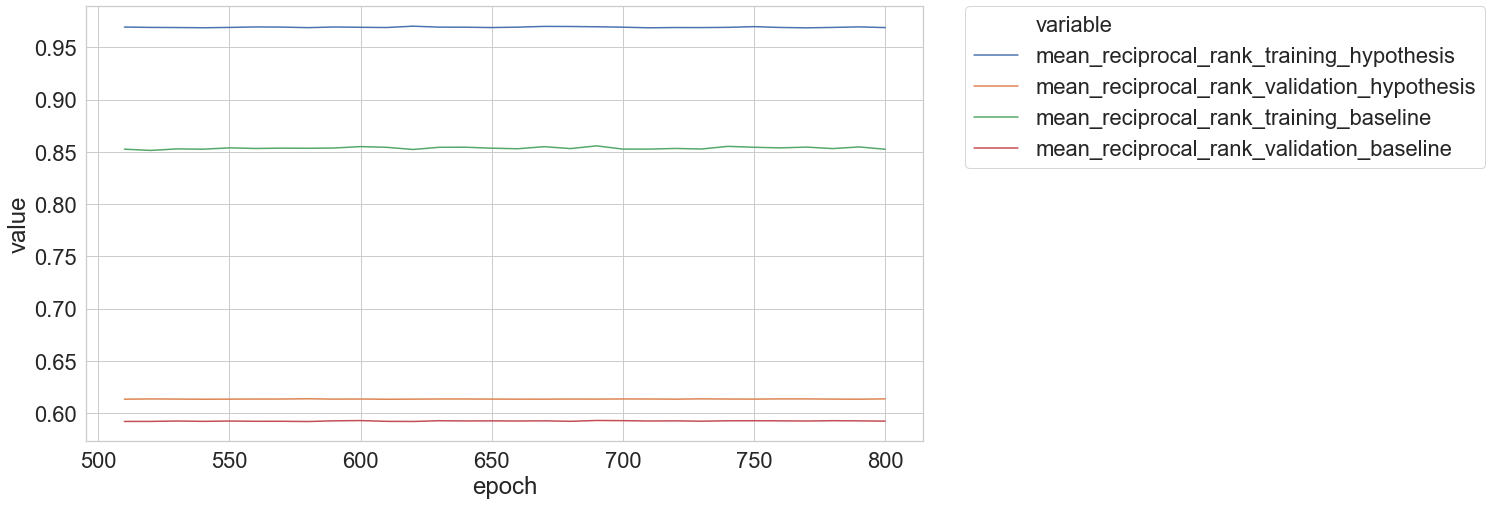

In [122]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 

ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_reciprocal_rank[50:], ['epoch']))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('FB15k_mean_reciprocal_rank_Results_Clipped.png', bbox_inches = "tight", format='PNG')